# A Practical Introduction to 9 regression algorithms

This is a notebook for the medium article [A Practical Introduction to 9 Regression Algorithms](https://bindichen.medium.com/a-practical-introduction-to-9-regression-algorithms-389057f86eb9)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)


### Get the dataset

In [1]:
!pip install vega_datasets

In [2]:
from vega_datasets import data
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline


In [3]:
df = data.cars()
df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              406 non-null    object        
 1   Miles_per_Gallon  398 non-null    float64       
 2   Cylinders         406 non-null    int64         
 3   Displacement      406 non-null    float64       
 4   Horsepower        400 non-null    float64       
 5   Weight_in_lbs     406 non-null    int64         
 6   Acceleration      406 non-null    float64       
 7   Year              406 non-null    datetime64[ns]
 8   Origin            406 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 28.7+ KB


In [5]:
# Filter out NaN rows in a specific column
df.dropna(subset=['Horsepower', 'Miles_per_Gallon'], inplace=True)

In [6]:
df.sort_values(by='Horsepower', inplace=True)

In [7]:
# Transform data
X = df['Horsepower'].to_numpy().reshape(-1, 1)
y = df['Miles_per_Gallon'].to_numpy().reshape(-1, 1)

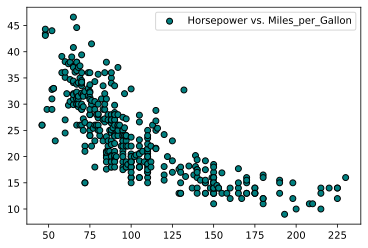

In [8]:
plt.scatter(X, y, color='teal', edgecolors='black', label='Horsepower vs. Miles_per_Gallon')
plt.legend()
plt.show()

## 1. Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Creating and Training the Model
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [11]:
linear_regressor.coef_

array([[-0.15784473]])

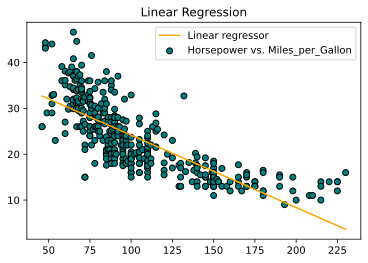

In [12]:
# Plot points and fit line for training data
plt.scatter(X, y, color='teal', edgecolors='black', label='Horsepower vs. Miles_per_Gallon')
plt.plot(X, linear_regressor.predict(X), color='orange', label='Linear regressor')
plt.title('Linear Regression')
plt.legend()
plt.show()

## 2. Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
# From here. we are simply generating the matrix for X^0, X^1 and X^2
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [23]:
# polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

LinearRegression()

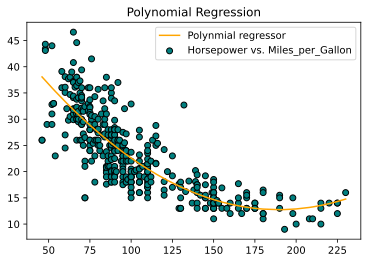

In [24]:
# Plot points and fit line for training data
plt.scatter(X, y, color='teal', edgecolors='black', label='Horsepower vs. Miles_per_Gallon')
plt.plot(X, poly_reg_model.predict(X_poly), color='orange', label='Polynmial regressor')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

## 3. Simple Vector Regression

In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [26]:
# Performing feature scaling
scaled_X = StandardScaler()
scaled_y = StandardScaler()

scaled_X = scaled_X.fit_transform(X)
scaled_y = scaled_y.fit_transform(y)

In [27]:
svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(scaled_X, scaled_y.ravel())

SVR(gamma='auto')

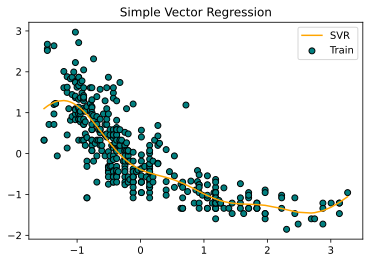

In [28]:
plt.scatter(scaled_X, scaled_y, color='teal', edgecolors='black', label='Train')
plt.plot(scaled_X, svr_regressor.predict(scaled_X), color='orange', label='SVR')
plt.title('Simple Vector Regression')
plt.legend()
plt.show()

## 4. Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
# No need to perform feature scaling. Since it will get taken care by the library itself.
tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

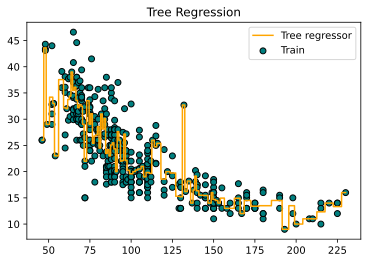

In [31]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='teal', edgecolors='black', label='Train')
plt.plot(X_grid, tree_regressor.predict(X_grid), color='orange', label='Tree regressor')
plt.title('Tree Regression')
plt.legend()
plt.show()

## 5. Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
forest_regressor = RandomForestRegressor(
    n_estimators = 300, 
    random_state = 0
)
forest_regressor.fit(X, y.ravel())

RandomForestRegressor(n_estimators=300, random_state=0)

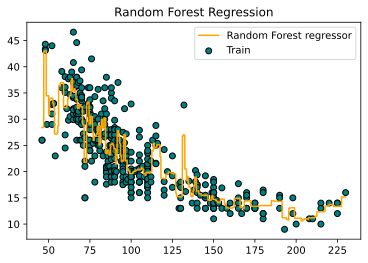

In [36]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='teal', edgecolors='black', label='Train')
plt.plot(X_grid, forest_regressor.predict(X_grid), color='orange', label='Random Forest regressor')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

## 6. LASSO Regression

In [37]:
from sklearn.linear_model import LassoCV

In [38]:
lasso = LassoCV()
lasso.fit(X, y.ravel())

LassoCV()

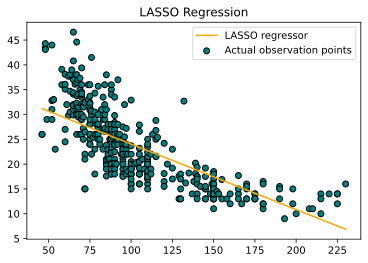

In [40]:
plt.scatter(X, y, color='teal', edgecolors='black', label='Actual observation points')
plt.plot(X, lasso.predict(X), color='orange', label='LASSO regressor')
plt.title('LASSO Regression')
plt.legend()
plt.show()

## 7. Ridge Regression

In [42]:
from sklearn.linear_model import RidgeCV

In [43]:
ridge = RidgeCV()
ridge.fit(X, y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

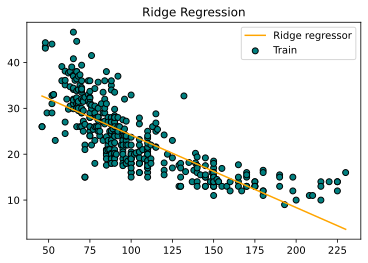

In [44]:
plt.scatter(X, y, color='teal', edgecolors='black', label='Train')
plt.plot(X, ridge.predict(X), color='orange', label='Ridge regressor')
plt.title('Ridge Regression')
plt.legend()
plt.show()

## 8. ElasticNet Regression

In [46]:
from sklearn.linear_model import ElasticNetCV
elasticNet = ElasticNetCV()
elasticNet.fit(X, y.ravel())

ElasticNetCV()

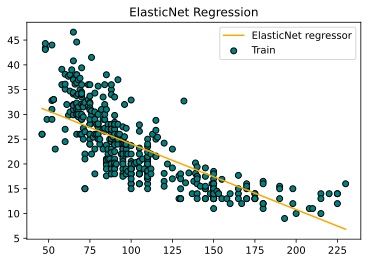

In [47]:
plt.scatter(X, y, color='teal', edgecolors='black', label='Train')
plt.plot(X, elasticNet.predict(X), color='orange',label='ElasticNet regressor')
plt.title('ElasticNet Regression')
plt.legend()
plt.show()

## 9. XGBoost regression

In [48]:
import xgboost

In [49]:
print(xgboost.__version__)

1.3.1


In [50]:
from xgboost import XGBRegressor
# create an xgboost regression model
model = XGBRegressor(
    n_estimators=1000, 
    max_depth=7, 
    eta=0.1, 
    subsample=0.7, 
    colsample_bytree=0.8,
)

In [51]:
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

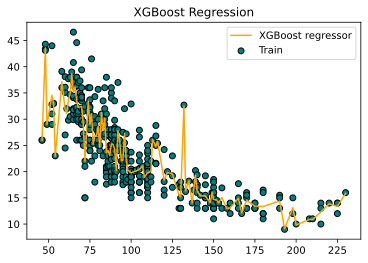

In [53]:
plt.scatter(X, y, color='teal', edgecolors='black', label='Train')
plt.plot(X, model.predict(X), color='orange',label='XGBoost regressor')
plt.title('XGBoost Regression')
plt.legend()
plt.show()

## Thanks for reading

This is a notebook for the medium article [A Practical Introduction to 9 Regression Algorithms](https://bindichen.medium.com/a-practical-introduction-to-9-regression-algorithms-389057f86eb9)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)